In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from astropy import modeling
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
data_dir = 'C:/Users/Zz3319/Desktop/Course/ECE143/Project/Notebook/Dataset/Indicators.csv'
data = pd.read_csv(data_dir)

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [4]:
countries = data['CountryName'].unique().tolist()
codes = data['CountryCode'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()
print("Countries: {}" .format(len(countries)))
print("Country Codes: {}".format(len(codes)))
print("Indicators: {}".format(len(indicators)))

Countries: 247
Country Codes: 247
Indicators: 1344


In [5]:
def subdata_code(data, first_indicator, country):
    mask1 = data['IndicatorName'].str.contains(first_indicator)
    mask2 = data['CountryCode'].str.contains(country)
    return data[mask1 & mask2]

def plotdata(gdp_stage_trunc, stage, country):
    #Plotting a subplot 
    fig, axis = plt.subplots()
    # Grid lines, Xticks, Xlabel, Ylabel

    axis.yaxis.grid(True)
    axis.set_title('CO2 Emissions vs. GDP (per capita) for '+country,fontsize=10)
    axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)   
    axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

    X = np.array(gdp_stage_trunc['Value'])                   # Obtaining GDP values 
    Y = np.array(stage['Value'])                             # Obtaining CO2 values
    
    X_sorted = sorted(X)   
    Y_sorted = [y for _,y in sorted(zip(X,Y))]# Obtaining CO2 values

    plt.plot(X_sorted, Y_sorted, 'b')
    plt.show()
    
    
def plotdata_Gausfit(gdp_stage_trunc, stage, country):
    #Plotting a subplot 
    fig, axis = plt.subplots()
    # Grid lines, Xticks, Xlabel, Ylabel

    axis.yaxis.grid(True)
    axis.set_title('CO2 Emissions vs. GDP (per capita) for '+country,fontsize=10)
    axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)   
    axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

    X = np.array(gdp_stage_trunc['Value'])                   # Obtaining GDP values 
    Y = np.array(stage['Value'])  
    X_sorted = sorted(X)
    
    Y_sorted = [y for _,y in sorted(zip(X,Y))]# Obtaining CO2 values
    n = len(X)                          #the number of data
    mean = sum(X)/n                   #note this correction
    sigma = np.sqrt(sum((X-mean)**2)/n)        #note this correction

#     axis.scatter(X, Y)
#     plt.show()
#     print(mean)
#     print(sigma)
    fitter = modeling.fitting.LevMarLSQFitter()
#     model = modeling.models.Gaussian1D(amplitude=0.0001, mean=mean, stddev=sigma)   # depending on the data you need to give some initial values
    model = modeling.models.Voigt1D()
    fitted_model = fitter(model, X_sorted, Y_sorted)
    axis.scatter(X, Y, label='Raw_Data')
    plt.plot(X_sorted, fitted_model(X_sorted),'ro:',label='fit')
    axis.legend()
    plt.show()
#     print(fitted_model)
#     print(fitted_model(X_sorted))
#     print(Y_sorted)
    
#     print(X_sorted)
#     print(Y_sorted)
#     n = len(X)                          #the number of data
#     mean = sum(X*Y)/n                   #note this correction
#     sigma = sum(Y*(X-mean)**2)/n        #note this correction

#     def gaus(x,a,x0,sigma,b):
#         return a*exp(-(x-x0)**2/(2*sigma**2))+b

#     popt,pcov = curve_fit(gaus,X_sorted,Y_sorted,p0=[5,mean,sigma,5])
#     axis.scatter(X, Y, label = 'Data')
#     plt.plot(X_sorted,gaus(X_sorted,*popt),'ro:',label='fit')
#     plt.legend()
#     plt.show()
#     print(*popt)
    
def subdata_name(data, first_indicator, country):
    mask1 = data['IndicatorName'].str.contains(first_indicator)
    mask2 = data['CountryName'].str.contains(country)
    return data[mask1 & mask2]

In [6]:
first_indicator = 'CO2 emissions \(metric'
second_indicator = 'GDP per capita \(constant 2005'

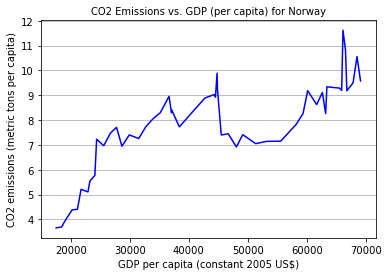

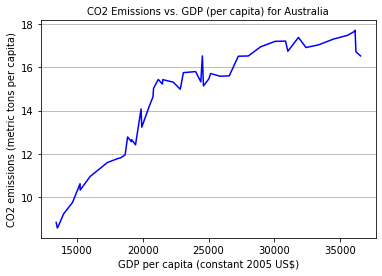

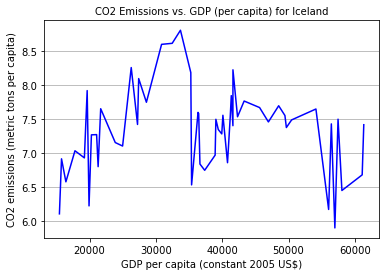

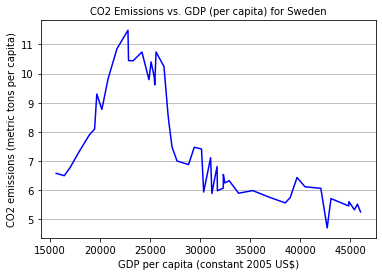

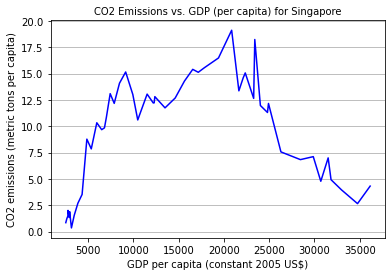

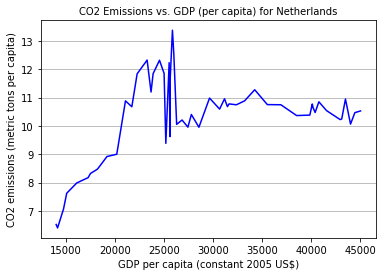

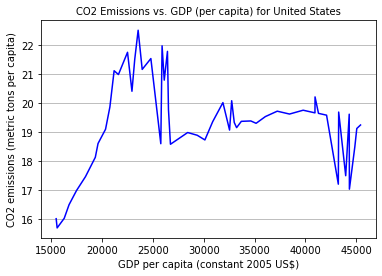

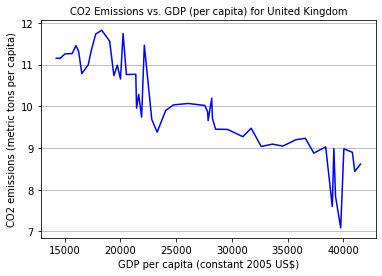

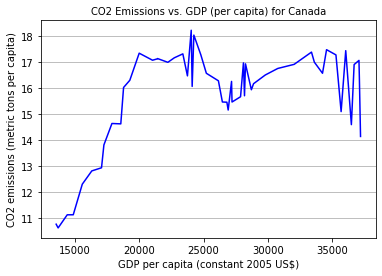

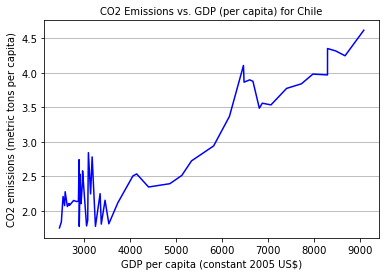

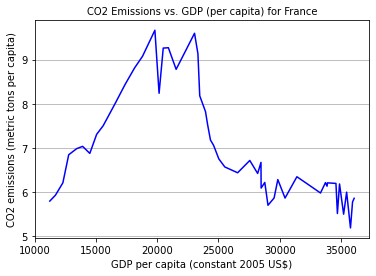

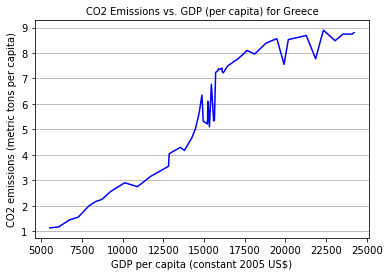

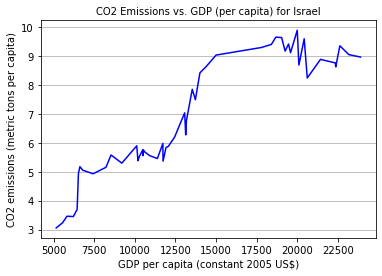

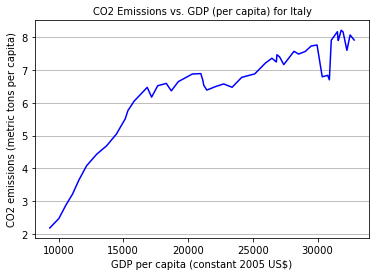

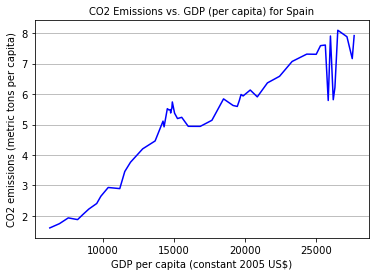

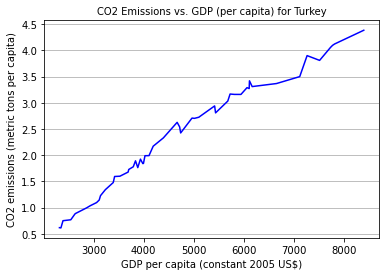

In [7]:
developed_countries = ['Norway', 'Switzerland', 'Ireland', 'Germany', 'Australia', 'Iceland', 'Sweden', 'Singapore', 'Netherlands', 'United States', 'United Kingdom', 'Canada', 'Chile', 'France', 'Greece', 'Israel', 'Italy', 'Spain', 'Turkey']

for country in developed_countries:
    CO2 = subdata_name(data, first_indicator, country)
    gdp_stage = subdata_name(data, second_indicator, country)

    gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]

    if len(CO2) == len(gdp_stage_trunc):
        plotdata(gdp_stage_trunc, CO2, country)


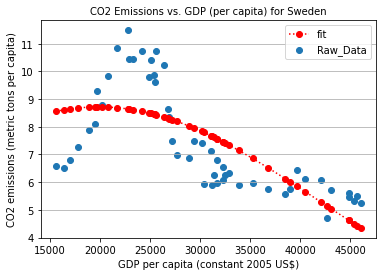

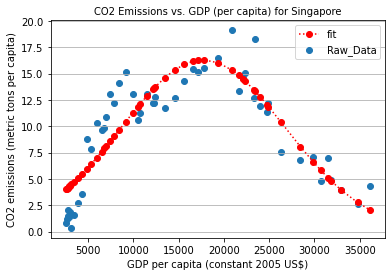

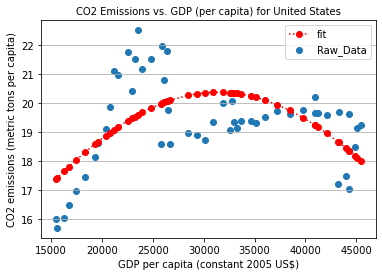

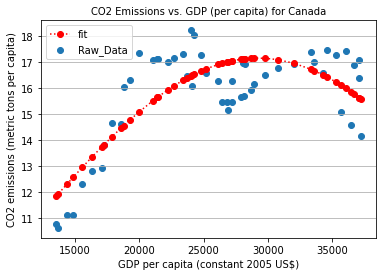

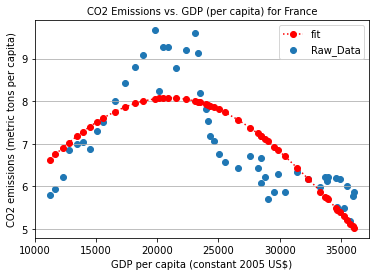

In [8]:
fitting_countries = ['Sweden', 'Singapore', 'United States', 'Canada', 'France']

for country in fitting_countries:
    CO2 = subdata_name(data, first_indicator, country)
    gdp_stage = subdata_name(data, second_indicator, country)

    gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]

    if len(CO2) == len(gdp_stage_trunc):
        plotdata_Gausfit(gdp_stage_trunc, CO2, country)

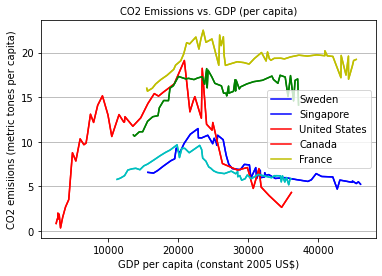

In [9]:
fitting_countries = ['Sweden', 'Singapore', 'United States', 'Canada', 'France']
colormap = ['b','r','y','g','c','m']

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP (per capita)', fontsize=10)
axis.set_xlabel('GDP per capita (constant 2005 US$)', fontsize=10)   
axis.set_ylabel('CO2 emisiions (metric tones per capita)',fontsize=10)

for country,color in zip(fitting_countries, colormap):
    CO2 = subdata_name(data, first_indicator, country)
    gdp_stage = subdata_name(data, second_indicator, country)

    gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]

#     plotdata_Gausfit(gdp_stage_trunc, CO2, country)
    
    X = np.array(gdp_stage_trunc['Value'])                   # Obtaining GDP values 
    Y = np.array(CO2['Value'])                             # Obtaining CO2 values
    
    X_sorted = sorted(X)   
    Y_sorted = [y for _,y in sorted(zip(X,Y))]# Obtaining CO2 values
    filtered = lowess(Y_sorted, X_sorted, is_sorted=True, frac=0.025, it=0)
    plt.plot(X_sorted, Y_sorted, color)
    plt.plot(filtered[:,0], filtered[:,1], color)
    
plt.legend(fitting_countries)
plt.show()
    
    
    
    
    
    
    

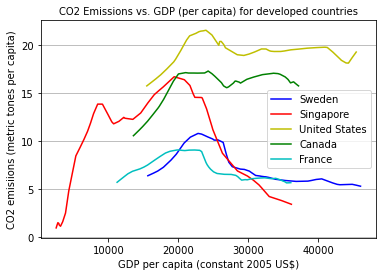

In [10]:
fitting_countries = ['Sweden', 'Singapore', 'United States', 'Canada', 'France']
colormap = ['b','r','y','g','c','m']

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP (per capita) for developed countries', fontsize=10)
axis.set_xlabel('GDP per capita (constant 2005 US$)', fontsize=10)   
axis.set_ylabel('CO2 emisiions (metric tones per capita)',fontsize=10)

for country,color in zip(fitting_countries, colormap):
    CO2 = subdata_name(data, first_indicator, country)
    gdp_stage = subdata_name(data, second_indicator, country)

    gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]

#     plotdata_Gausfit(gdp_stage_trunc, CO2, country)
    
    X = np.array(gdp_stage_trunc['Value'])                   # Obtaining GDP values 
    Y = np.array(CO2['Value'])                             # Obtaining CO2 values
    
    X_sorted = sorted(X)   
    Y_sorted = [y for _,y in sorted(zip(X,Y))]# Obtaining CO2 values
    filtered = lowess(Y_sorted, X_sorted, is_sorted=True, frac=0.15, it=0)
    plt.plot(filtered[:,0], filtered[:,1], color)
    
plt.legend(fitting_countries)
plt.show()

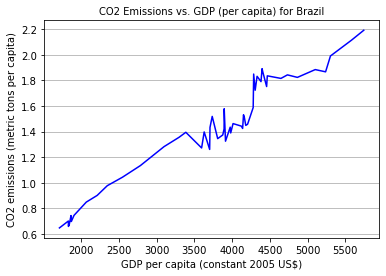

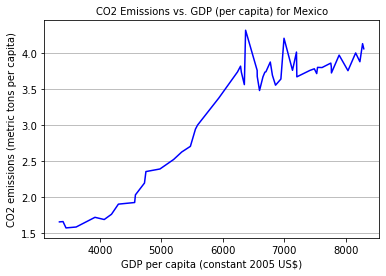

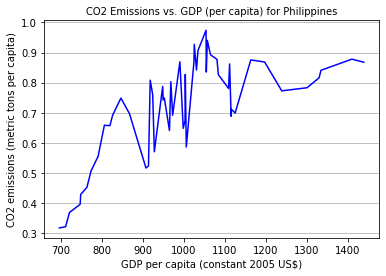

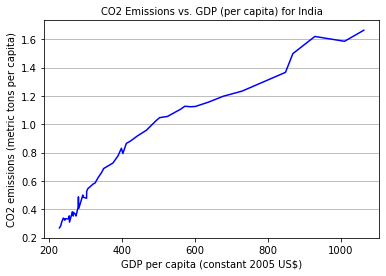

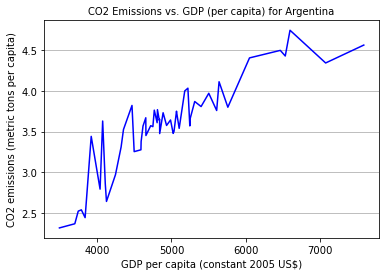

In [11]:
developing_countries = ['Brazil', 'Malaysia', 'Mexico', 'Philippines', 'India', 'Russia', 'Qatar', 'Argentina']
for country in developing_countries:
    CO2 = subdata_name(data, first_indicator, country)
    gdp_stage = subdata_name(data, second_indicator, country)

    gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]

    if len(CO2) == len(gdp_stage_trunc):
        plotdata(gdp_stage_trunc, CO2, country)
        
        

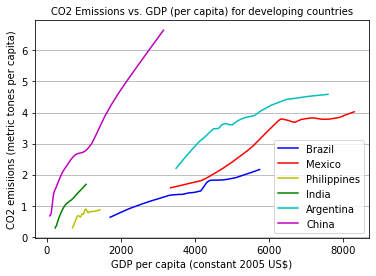

In [12]:
developing_countries = ['Brazil', 'Mexico', 'Philippines', 'India', 'Argentina']
colormap = ['b','r','y','g','c','m']

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP (per capita) for developing countries', fontsize=10)
axis.set_xlabel('GDP per capita (constant 2005 US$)', fontsize=10)   
axis.set_ylabel('CO2 emisiions (metric tones per capita)',fontsize=10)

for country,color in zip(developing_countries, colormap):
    CO2 = subdata_name(data, first_indicator, country)
    gdp_stage = subdata_name(data, second_indicator, country)

    gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]

#     plotdata_Gausfit(gdp_stage_trunc, CO2, country)
    
    X = np.array(gdp_stage_trunc['Value'])                   # Obtaining GDP values 
    Y = np.array(CO2['Value'])                             # Obtaining CO2 values
    
    X_sorted = sorted(X)   
    Y_sorted = [y for _,y in sorted(zip(X,Y))]# Obtaining CO2 values
    filtered = lowess(Y_sorted, X_sorted, is_sorted=True, frac=0.25, it=0)
    plt.plot(filtered[:,0], filtered[:,1], color)
    
country_code = 'CHN'
CO2 = subdata_code(data, first_indicator, country_code)
gdp_stage = subdata_code(data, second_indicator, country_code)
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
X = np.array(gdp_stage_trunc['Value'])                   # Obtaining GDP values 
Y = np.array(CO2['Value'])                             # Obtaining CO2 values

X_sorted = sorted(X)   
Y_sorted = [y for _,y in sorted(zip(X,Y))]# Obtaining CO2 values
filtered = lowess(Y_sorted, X_sorted, is_sorted=True, frac=0.25, it=0)
plt.plot(filtered[:,0], filtered[:,1], 'm')
developing_countries = ['Brazil', 'Mexico', 'Philippines', 'India', 'Argentina', 'China']
plt.legend(developing_countries)
plt.show()

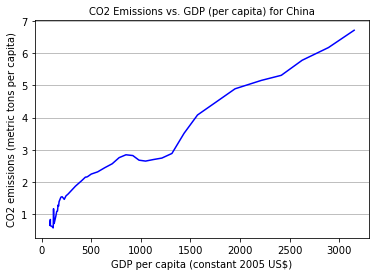

In [13]:
country_code = 'CHN'
CO2 = subdata_code(data, first_indicator, country_code)
gdp_stage = subdata_code(data, second_indicator, country_code)
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
plotdata(gdp_stage_trunc, CO2, 'China')